In [1]:
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox import *
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import cm
import random
import RobotUtils
import copy
from AGS import *
%matplotlib notebook

In [2]:
best_params={'RRR':[0.37399638, 0.30788124, 0.37120282, 0.12558966, 0.60760613, 0.        ],
             'RRP':[0.9875,     0.0125,     0.1625466,  0.4817367,  0.39810881, 0.        ],
             'RPR':[0.54450874, 1,         0.37960028, 0.03463499, 0.85949955, 0.66994179],
             'RPP':[0.27077442, 1,         0.8867471,  0.04338006, 0.27032156, 0.93767837],
             'PRR':[0.48863159, 0.63613952, 0.54239318, 0.03589418, 0.50738887, 0.4421379 ],
             'PRP':[0.49788597, 0.9385105,  0.23517399, 0.66734528, 0.12125098, 0.10483043],
             'PPR':[0.6058,     1,         0.58152854, 0.15535925, 0.68429162, 0.        ],
             'PPP':[0.72918102, 0.43883206, 0.6290117,  0.09979241, 0.22962579, 0.15      ]
}

best_robot={'RRR':[11.23306184, 12.48111204,  5.31771044,  5.33609612,  5.90150113,  6.28562758, 14.5638224,   8.49863607,  6.84317849],
             'RRP':[ 8.71675744,  5.70768903,  2.17965548,  4.25797012,  3.34926336,  4.78766454, 12.87744177,  0.31179287,  5.68913093],
             'RPR':[10.64684436, 13.38811273,  3.8579478,   1.70055982,  2.68254482,  6.50700445, 11.32737615, 10.1088687,   8.87236288],
             'RPP':[ 0.83725654, 12.95038303, 12.29085735,  0.45054016, -0.06409739,  1.3101831, 13.0310401,   7.36354981,  6.39721528],
             'PRR':[ 6.22697282, 10.23733158,  9.34028465,  2.59269922,  4.21088118,  4.84412867, 3.83321705,  3.60474752,  4.60252661],
             'PRP':[12.12321146,  4.32149518,  4.442002,    3.23583712,  1.52536423,  2.61780641, 4.34611758,  2.94626255,  2.75091088],
             'PPR':[ 8.29119605,  5.32766757, 11.88307936,  3.59120601,  5.83991788,  3.62756479, 1.6945062,   0.36771268,  3.09965049],
             'PPP':[9.62660838, 7.44798189, 8.30417654, 1.0278539,  1.27524894, 4.35385906, 4.22372948, 5.02790715, 1.20785195]
           }


#best_params={'RRR':[random.random() for i in range(6)]}

robot_str_list=['RRR','RRP','RPR','RPP','PRR','PRP','PPR','PPP']
for robot_str in robot_str_list:
    cromossome=best_params[robot_str]
    ag3_params={}
    ag3_params['num_ind'] = int(cromossome[0]*47)+3  # [3,50]
    ag3_params['mut_rate'] = cromossome[1]*0.5 + 0.5  # [0.5, 1]
    ag3_params['to_kill_perc'] = cromossome[2]  # [0,1]
    ag3_params['mut_mag'] = cromossome[3]*0.5+0.0001  # [0.001,2] 
    ag3_params['exp_decay'] = cromossome[4]   #  [0, 1]
    ag3_params['step'] = int(cromossome[5]*99)+1   # [1, 100]
    ag3_params['sel_tech']='EL'
    ag3_params['co_tech']='AVG'
    print("{}, {}".format(robot_str,ag3_params))

RRR, {'num_ind': 20, 'mut_rate': 0.65394062, 'to_kill_perc': 0.37120282, 'mut_mag': 0.06289483, 'exp_decay': 0.60760613, 'step': 1, 'sel_tech': 'EL', 'co_tech': 'AVG'}
RRP, {'num_ind': 49, 'mut_rate': 0.50625, 'to_kill_perc': 0.1625466, 'mut_mag': 0.24096835, 'exp_decay': 0.39810881, 'step': 1, 'sel_tech': 'EL', 'co_tech': 'AVG'}
RPR, {'num_ind': 28, 'mut_rate': 1.0, 'to_kill_perc': 0.37960028, 'mut_mag': 0.017417494999999998, 'exp_decay': 0.85949955, 'step': 67, 'sel_tech': 'EL', 'co_tech': 'AVG'}
RPP, {'num_ind': 15, 'mut_rate': 1.0, 'to_kill_perc': 0.8867471, 'mut_mag': 0.02179003, 'exp_decay': 0.27032156, 'step': 93, 'sel_tech': 'EL', 'co_tech': 'AVG'}
PRR, {'num_ind': 25, 'mut_rate': 0.81806976, 'to_kill_perc': 0.54239318, 'mut_mag': 0.01804709, 'exp_decay': 0.50738887, 'step': 44, 'sel_tech': 'EL', 'co_tech': 'AVG'}
PRP, {'num_ind': 26, 'mut_rate': 0.96925525, 'to_kill_perc': 0.23517399, 'mut_mag': 0.33377264, 'exp_decay': 0.12125098, 'step': 11, 'sel_tech': 'EL', 'co_tech': 'AVG

<IPython.core.display.Javascript object>


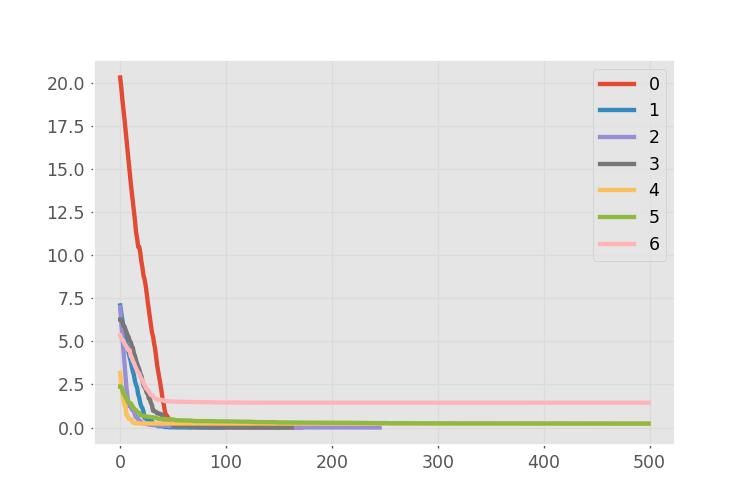

In [3]:


robot_str='RRR'


robot_params=best_robot[robot_str]
const_list=robot_params[0:3]
a_list=robot_params[3:6]
alpha_list=robot_params[6:9]
robot = robot_build_funcs[robot_str]('', const_list, a_list, alpha_list)
sel_tech='EL' # 'EL' or 'TN' OBS: so acompanha a media de forma rigida se for elitimos (isso ja era esperado)
co_tech='AVG' # 'AVG' or 'BST' or 'RAN'

label_idx=0

cromossome=best_params[robot_str]

ag3_params={}
ag3_params['num_ind'] = int(cromossome[0]*47)+3  # [3,50]
ag3_params['mut_rate'] = cromossome[1]*0.5 + 0.5  # [0.5, 1]
ag3_params['to_kill_perc'] = cromossome[2]  # [0,1]
ag3_params['mut_mag'] = cromossome[3]*0.5+0.0001  # [0.001,2] 
ag3_params['exp_decay'] = cromossome[4]   #  [0, 1]
ag3_params['step'] = int(cromossome[5]*99)+1   # [1, 100]
ag3_params['sel_tech']='EL'
ag3_params['co_tech']='AVG'

try:
    ag3_params['to_kill_freq'] = int(cromossome[6]*74)+1 # [1,75]
except:
    ag3_params['to_kill_freq'] = 1

juntas=[[2,2,2],
        [3,3,3],
        [4,4,4],
        [5,5,5],
        [6,6,6],
        [7,7,7],
        [8,8,8]
       ]

juntas=[]
for i in range(7):
    juntas.append(list(np.random.randint(low=-5,high=5,size=3)))



fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
ag3_list=[]
for junta_idx in range(len(juntas)):
    if(junta_idx==0):
        juntas_init=[0,0,0]
    else:
        juntas_init=last_solution
    P0=juntas[junta_idx]

    ag3=AG3Int(ag3_params['num_ind'],robot,juntas_init,
               P0,ag3_params['mut_rate'],ag3_params['co_tech'],ag3_params['sel_tech'],
               ag3_params['to_kill_perc'],ag3_params['to_kill_freq'],ag3_params['mut_mag'],
               ag3_params['exp_decay'],ag3_params['step'])
    ag3.run(500)
    last_solution=list(ag3.individuals[ag3.best_idx]['cr'])
    ag3_list.append(ag3)
    #plt.plot(ag3.mean_list,linewidth=2.5,label=label_idx)
    plt.plot(ag3.best_score_list,linewidth=2.5,label=label_idx)
    label_idx+=1


plt.show()
plt.legend()

In [4]:
all_q_gif=[]
for ag3 in ag3_list:
    all_q_gif+=ag3.q_gif
ag3_list.append(ag3_list[-1])

<IPython.core.display.Javascript object>


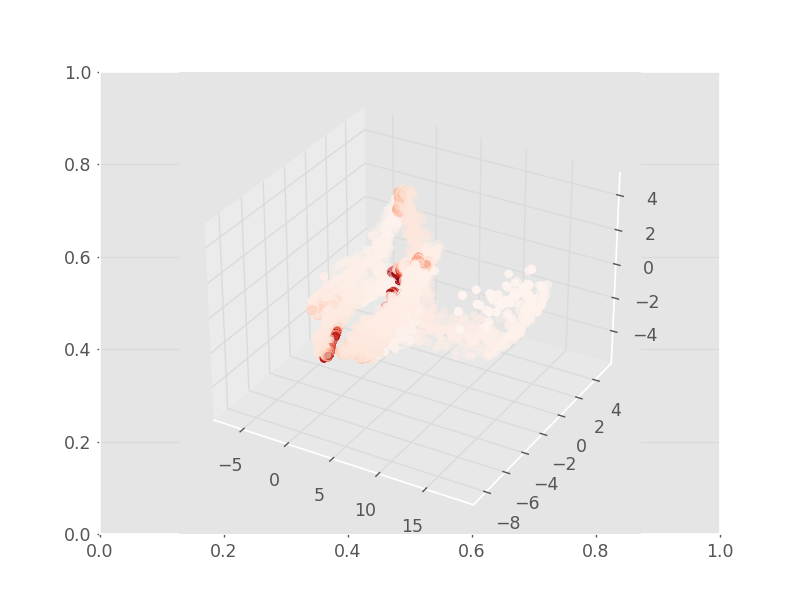

In [5]:
x_data = []
y_data = []
z_data = []
gen_data = []
gen_num = 0
gen = 0
ag3_idx=0

for q_conf in all_q_gif:
    if(gen==(ag3_list[ag3_idx].gen-1)):
        ag3_idx+=1
        gen=0
    if (gen_num == ag3_list[0].num_crs):
        gen += 1
        gen_num = 0
    [x, y, z] = ag3_list[0].robot.fkine(q_conf).A[0:3, 3]
    x_data.append(x)
    y_data.append(y)
    z_data.append(z)
    gen_data.append(gen)
    gen_num += 1
fig, axes = plt.subplots()
axes = plt.axes(projection='3d')
axes.scatter3D(x_data, y_data, z_data, c=gen_data, cmap='Reds')
